Раскрыть характер и особенности задержек авиарейсов.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
data1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
data2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'    

flights = pd.read_csv(data1, sep=',')
weather = pd.read_csv(data2, sep=',')

Общая статистика по количеству задержек

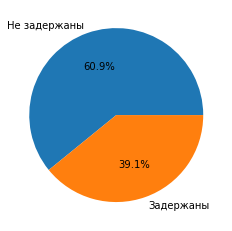

In [29]:
delay = flights.groupby(flights[flights.dep_delay>0]['hour']).size().reset_index(name = 'del_ammount')
flight = flights.groupby('hour').size().reset_index(name = 'fl_ammount')
total = pd.merge(delay, flight, on = 'hour')
fl_ammount = total['fl_ammount'].sum()
del_ammount = total['del_ammount'].sum()
total['Percentage'] = (total['del_ammount'] / total['fl_ammount']) * 100
plt.pie([fl_ammount - del_ammount, del_ammount], labels=['Не задержаны', 'Задержаны'],autopct='%1.1f%%')
plt.show()

Зависимость количества задержек от месяца

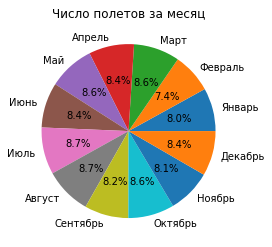

In [28]:
attraction_month = flights.groupby('month')['Unnamed: 0']
arr = attraction_month.count()

plt.title('Число полетов за месяц')
labels = ["Январь", "Февраль", "Март", "Апрель", "Май", "Июнь", "Июль", "Август",
          "Сентябрь", "Октябрь", "Ноябрь", "Декабрь" ]
plt.pie(arr, labels = labels, autopct='%1.1f%%')
plt.show()

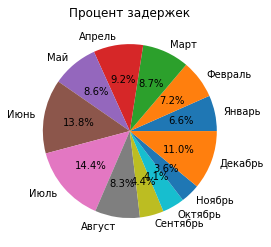

In [31]:
month_flights = flights.groupby("month")
delay = month_flights['dep_delay'].mean()
labels = ["Январь", "Февраль", "Март", "Апрель", "Май", "Июнь", "Июль", "Август",
          "Сентябрь", "Октябрь", "Ноябрь", "Декабрь" ]
plt.pie(delay, labels = labels, autopct='%1.1f%%')
plt.title("Процент задержек")
plt.show()

При примерно равномерном распределении числа полетов на месяц, количество задержек увеличивается на период Июнь, Июль и Декабрь. Скорее всего это связано с отпускными сезонами и праздниками. Поскольку поток людей не менялся, значит виноноваты сотрудники аэропорта. Следует нанять более ответственных рабочих

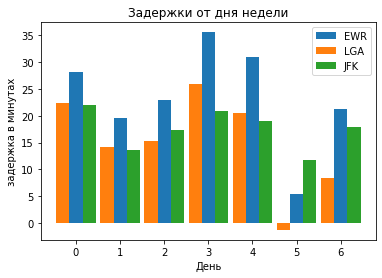

In [32]:
flights['delay'] = flights['arr_delay'] + flights['dep_delay']

flights['weekday'] = pd.to_datetime(flights[['year', 'month', 'day', 'hour']])
flights['weekday'] = flights['weekday'].apply(lambda x: x.weekday())
flights['time'] = pd.to_datetime(flights[['year', 'month', 'day', 'hour']])
flights['time'] = flights['time'].apply(lambda x: x.dayofyear)
flights['dayofyear'] = flights['time']
flights['time'] = (flights['time']-1)*24 + flights['hour']
flights['week'] = flights['dayofyear']//7 + 1;

plt.title('Задержки от дня недели')
plt.bar(np.array([i for i in range(7)]), np.array(flights[flights['origin']=='EWR'].groupby('weekday')['delay'].mean()), width = 0.3, label='EWR')
plt.bar(np.array([i for i in range(7)])-0.3, np.array(flights[flights['origin']=='LGA'].groupby('weekday')['delay'].mean()), width = 0.3, label='LGA')
plt.bar(np.array([i for i in range(7)])+0.3, np.array(flights[flights['origin']=='JFK'].groupby('weekday')['delay'].mean()), width = 0.3, label='JFK')
plt.legend()

plt.xlabel('День')
plt.ylabel('задержка в минутах')

plt.show()


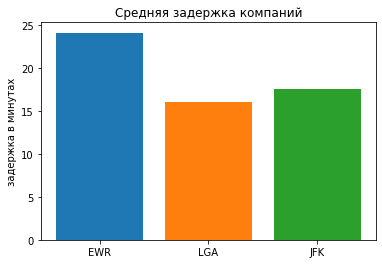

In [33]:
plt.title('Средняя задержка компаний')
labels =['EWR', 'LGA', 'JFK' ]

plt.bar('EWR', np.array(flights[flights['origin']=='EWR'].groupby('origin')['delay'].mean()), label='EWR')
plt.bar('LGA', np.array(flights[flights['origin']=='LGA'].groupby('origin')['delay'].mean()), label='LGA')
plt.bar('JFK', np.array(flights[flights['origin']=='JFK'].groupby('origin')['delay'].mean()), label='JFK')

plt.ylabel('задержка в минутах')

plt.show()

Каждый день недели кроме субботы не обходится без задержки. Возможно, стоит перераспределить нагрузку авиакомпаний

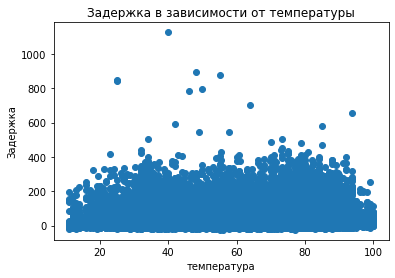

In [45]:
flight_weather = flights.merge(weather, on=['year', 'month', 'day', 'hour', 'origin'], how='inner' )
plt.title('Задержка в зависимости от температуры')
plt.scatter(flight_weather['temp'], flight_weather['dep_delay'])
plt.xlabel('температура')
plt.ylabel('Задержка')
plt.show()

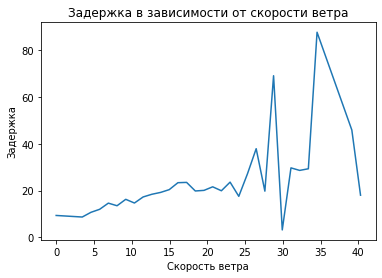

In [46]:
plt.title('Задержка в зависимости от скорости ветра')
p=flight_weather.loc[:, ['dep_delay','wind_speed']].groupby('wind_speed').mean()
plt.plot(list(p.index[:-1]),list(p['dep_delay'])[:-1])
plt.xlabel('Скорость ветра')
plt.ylabel('Задержка')
plt.show()

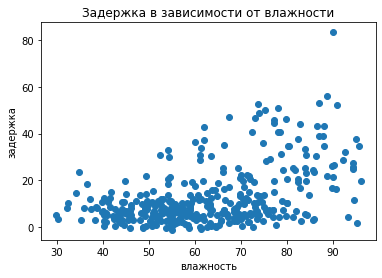

In [47]:
plt.title('Задержка в зависимости от влажности')
humid = flight_weather.groupby(['month', 'day'])['humid'].mean()
delay = flights.groupby(['month', 'day'])['dep_delay'].mean()
delay_humid = delay.drop(labels = [delay.index[-1]])
plt.scatter(humid, delay_humid)
plt.xlabel('влажность')
plt.ylabel('задержка')
plt.show()

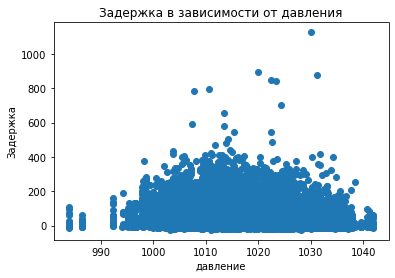

In [48]:
plt.title('Задержка в зависимости от давления')
plt.scatter(flight_weather['pressure'], flight_weather['dep_delay'])
plt.xlabel('давление')
plt.ylabel('Задержка')
plt.show()

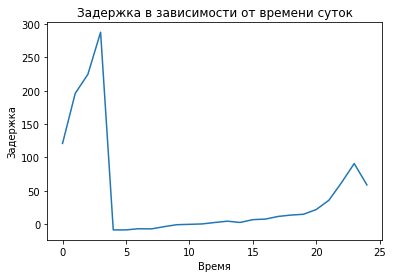

In [49]:
arrival_del = flights.dropna(subset=['arr_delay'])
arrival_del = arrival_del.groupby('hour')['arr_delay'].mean()
plt.plot(arrival_del.index, arrival_del)
plt.xlabel('Время')
plt.ylabel('Задержка')
plt.title('Задержка в зависимости от времени суток')
plt.show()

Задержка не зависит от следующих показателей: давление, температура. Зависит: влажность, время суток, скорость ветра. С этими показателями человек не способен справится. Разве что убрать полеты в некоторые ночные часы, чтобы задержек в это время не было, и таким образом, улучшить статистику (типичная Россия) 